In [103]:
import pandas as pd

In [104]:
data=pd.read_csv("train 1.csv")

In [105]:
data

,date,store,item,sales
0,1/1/2013,1,1,13
1,1/2/2013,1,1,11
2,1/3/2013,1,1,14
3,1/4/2013,1,1,13
4,1/5/2013,1,1,10
...,...,...,...,...
912995,12/27/2017,10,50,63
912996,12/28/2017,10,50,59
912997,12/29/2017,10,50,74
912998,12/30/2017,10,50,62


In [106]:
data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [107]:
#changing datatype to date/datetime using astype.ns (nano sec.)
#datetime[ns] is the datatype for date on python, data can be grouped yearly,quarterly,monthly or daily. the as type is 
#used to convert data types.
data["date"].astype("datetime64[ns]")

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: date, Length: 913000, dtype: datetime64[ns]

In [108]:
data["date"]=data["date"].astype("datetime64[ns]")

In [109]:
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [110]:
#to convert my data type to a datatime period column, eg Q=quater y=yearly
data["date"].dt.to_period("Y")

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
912995    2017
912996    2017
912997    2017
912998    2017
912999    2017
Name: date, Length: 913000, dtype: period[A-DEC]

In [111]:
#insert into a varriable.
A = data["date"].dt.to_period("Y")

In [112]:
#create a new column yearly and insert into it.
data.insert(1, "Yearly sales", A)

In [113]:
#using groupby to group in the sales made in each year in the datas.you can do it this way if you got a warning and dont want to
#import warnings data.groupby("Yearly sales").sum(numeric_only)
data.groupby("Yearly sales").sum()

,store,item,sales
Yearly sales,,,
2013,1003750,4653750,7941243
2014,1003750,4653750,9135482
2015,1003750,4653750,9536887
2016,1006500,4666500,10357160
2017,1003750,4653750,10733740


In [114]:
#picking out the need columns from the sumations eg taking out items and sales.
data.groupby("Yearly sales").sum()[["item","sales"]]

,item,sales
Yearly sales,,
2013,4653750,7941243
2014,4653750,9135482
2015,4653750,9536887
2016,4666500,10357160
2017,4653750,10733740


In [115]:
#nlargest is use to get the higest in a colum by number of rows.
data.groupby("Yearly sales").sum()[["item","sales"]].nlargest(1, "sales")

,item,sales
Yearly sales,,
2017,4653750,10733740


In [116]:
data.groupby("Yearly sales").sum()[["item","sales"]].nlargest(3, "sales")

,item,sales
Yearly sales,,
2017,4653750,10733740
2016,4666500,10357160
2015,4653750,9536887


In [117]:
data.groupby("Yearly sales").sum()[["item","sales"]].nsmallest(9, "sales")

,item,sales
Yearly sales,,
2013,4653750,7941243
2014,4653750,9135482
2015,4653750,9536887
2016,4666500,10357160
2017,4653750,10733740


In [118]:
suma = data.groupby("Yearly sales").sum()[["item","sales"]].nsmallest(9, "sales")

### VISUALIZING DATA

In [119]:
suma

,item,sales
Yearly sales,,
2013,4653750,7941243
2014,4653750,9135482
2015,4653750,9536887
2016,4666500,10357160
2017,4653750,10733740


In [120]:
#making yearly sales into a column by resetting index back to 0, instead of using yearly sales.
suma.reset_index()

,Yearly sales,item,sales
0,2013,4653750,7941243
1,2014,4653750,9135482
2,2015,4653750,9536887
3,2016,4666500,10357160
4,2017,4653750,10733740


In [121]:
suma = suma.reset_index()

In [122]:
suma

,Yearly sales,item,sales
0,2013,4653750,7941243
1,2014,4653750,9135482
2,2015,4653750,9536887
3,2016,4666500,10357160
4,2017,4653750,10733740


In [123]:
suma.dtypes

Yearly sales    period[A-DEC]
item                    int64
sales                   int64
dtype: object

#### before plot we need to convert the period back to datetime,using timestamp() & nt datatime() because the data was converted to period.


In [124]:
suma["Yearly sales"].dt.to_timestamp()

0   2013-01-01
1   2014-01-01
2   2015-01-01
3   2016-01-01
4   2017-01-01
Name: Yearly sales, dtype: datetime64[ns]

In [125]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Yearly sales'>

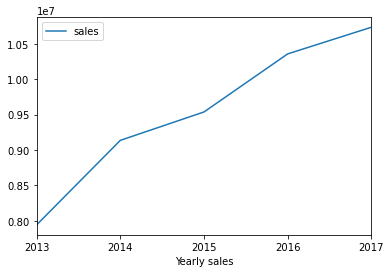

In [126]:
suma.plot(kind="line", x="Yearly sales", y="sales")

<AxesSubplot:xlabel='Yearly sales'>

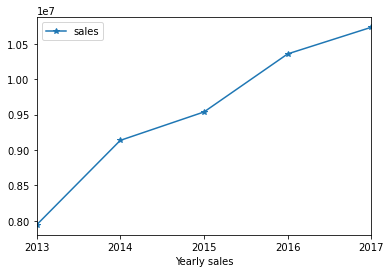

In [127]:
#using marker to indicate.
suma.plot(kind="line", x="Yearly sales", y="sales", marker="*")

<AxesSubplot:xlabel='Yearly sales'>

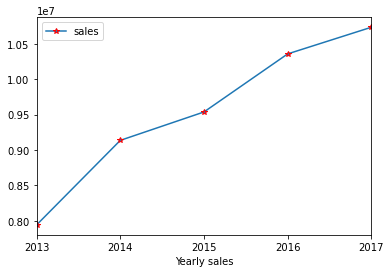

In [128]:
#to chnage marker color use mec(marker edge color)
suma.plot(kind="line", x="Yearly sales", y="sales", marker="*", mec="red")

In [129]:
#assignment. from the above get the monthly sales and vizualize.

In [130]:
data["date"].dt.to_period("M")

0         2013-01
1         2013-01
2         2013-01
3         2013-01
4         2013-01
           ...   
912995    2017-12
912996    2017-12
912997    2017-12
912998    2017-12
912999    2017-12
Name: date, Length: 913000, dtype: period[M]

In [131]:
b = data["date"].dt.to_period("M")

In [132]:
data.insert(1, "Mothly Sales", b)

In [133]:
data.groupby("Mothly Sales").sum()[["item","sales"]]

,item,sales
Mothly Sales,,
2013-01,395250,454904
2013-02,357000,459417
2013-03,395250,617382
2013-04,382500,682274
2013-05,395250,763242
2013-06,382500,795597
2013-07,395250,855922
2013-08,395250,766761
2013-09,382500,689907


In [134]:
data.groupby("Mothly Sales").sum()[["item","sales"]].nlargest(1,"sales")

,item,sales
Mothly Sales,,
2017-07,395250,1171393


In [135]:
data.groupby("Mothly Sales").sum().nsmallest(1,"sales")

,store,item,sales
Mothly Sales,,,
2013-01,85250,395250,454904


In [136]:
data.groupby("Mothly Sales").sum().nlargest(1,"sales")

,store,item,sales
Mothly Sales,,,
2017-07,85250,395250,1171393


In [137]:
data.groupby("Mothly Sales").sum().nlargest(10,"sales")

,store,item,sales
Mothly Sales,,,
2017-07,85250,395250,1171393
2016-07,85250,395250,1138718
2017-06,82500,382500,1064624
2015-07,85250,395250,1037350
2017-08,85250,395250,1026403
2016-06,82500,382500,1022664
2017-05,85250,395250,1020686
2014-07,85250,395250,989010
2016-05,85250,395250,988730


In [138]:
dda = data.groupby("Mothly Sales").sum().nlargest(10,"sales")

In [139]:
dda

,store,item,sales
Mothly Sales,,,
2017-07,85250,395250,1171393
2016-07,85250,395250,1138718
2017-06,82500,382500,1064624
2015-07,85250,395250,1037350
2017-08,85250,395250,1026403
2016-06,82500,382500,1022664
2017-05,85250,395250,1020686
2014-07,85250,395250,989010
2016-05,85250,395250,988730


In [140]:
dda.reset_index()

,Mothly Sales,store,item,sales
0,2017-07,85250,395250,1171393
1,2016-07,85250,395250,1138718
2,2017-06,82500,382500,1064624
3,2015-07,85250,395250,1037350
4,2017-08,85250,395250,1026403
5,2016-06,82500,382500,1022664
6,2017-05,85250,395250,1020686
7,2014-07,85250,395250,989010
8,2016-05,85250,395250,988730
9,2016-08,85250,395250,981494


In [141]:
dda = dda.reset_index()

In [142]:
dda.dtypes

Mothly Sales    period[M]
store               int64
item                int64
sales               int64
dtype: object

In [143]:
dda["Mothly Sales"].dt.to_timestamp()

0   2017-07-01
1   2016-07-01
2   2017-06-01
3   2015-07-01
4   2017-08-01
5   2016-06-01
6   2017-05-01
7   2014-07-01
8   2016-05-01
9   2016-08-01
Name: Mothly Sales, dtype: datetime64[ns]

In [144]:
dda["Mothly Sales"]=dda["Mothly Sales"].dt.to_timestamp()

<AxesSubplot:xlabel='Mothly Sales'>

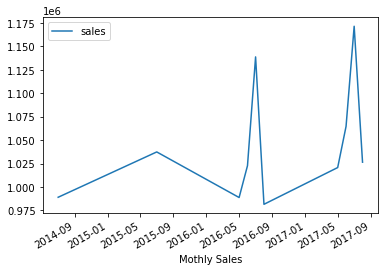

In [145]:
dda.plot(kind="line", x="Mothly Sales", y="sales")

<AxesSubplot:xlabel='Mothly Sales'>

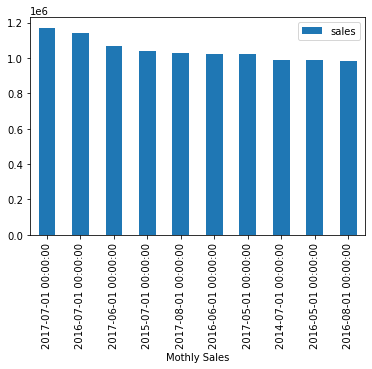

In [146]:
dda.plot(kind="bar", x="Mothly Sales", y="sales")

<AxesSubplot:ylabel='Mothly Sales'>

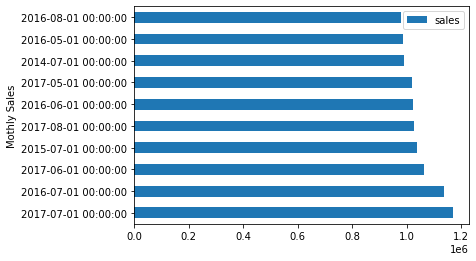

In [147]:
dda.plot(kind="barh", x="Mothly Sales", y="sales")

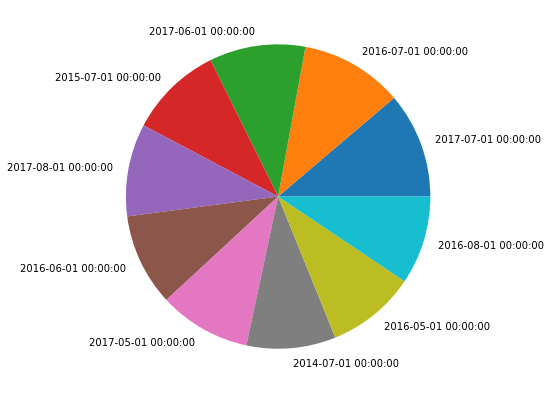

In [153]:
plt.figure(figsize=(14,7))
plt.pie(dda["sales"],labels=dda["Mothly Sales"])
plt.show()

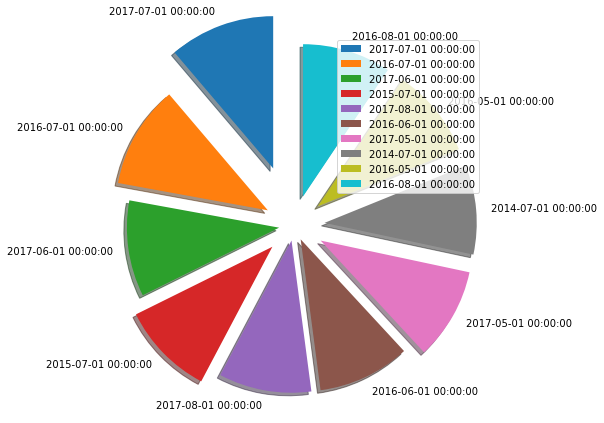

In [157]:
plt.figure(figsize=(13,7))
plt.pie(dda["sales"],labels=dda["Mothly Sales"],shadow=True,
        explode=[0.4,0.2,0.1,0.2,0.1,0.1,0.2,0.2,0.2,0.2],startangle=90)
plt.legend(loc="upper right")
plt.show()